# House Prices: Advanced Regression Techniques

1. Hypothesis (Before looking the data)

   Larger area, higher price
   More Bedroom, higher price
   More Bathroom, higher price
   Higher School rate, higher price
   Newer house, higher price
   Lower store, higher price
   House type (single family, townhouse, conde), price decrease
   Sale type (loan, cash), price decrease
   Others (Remodel, roof, safty)

2. Look at the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# Reading Data
train = pd.read_csv('C:\\Users\\alexliuyi\\Documents\\Kaggle\\Home Price\\data\\train.csv')
test  = pd.read_csv('C:\\Users\\alexliuyi\\Documents\\Kaggle\\Home Price\\data\\test.csv')
data  = train.append(test, sort=False)

print('Shape of Train', train.shape)
print('Shape of Test',  test.shape)
print('Shape of Data',  data.shape)

Shape of Train (1460, 81)
Shape of Test (1459, 80)
Shape of Data (2919, 81)


In [3]:
numeric_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
               'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'lotarea_new',
               'grlivarea_new', '_1stflrsf_new', 'age_built', 'age_remode']

# Categorical Variables
cat_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
           'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
           'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual',
           'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical',
           'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond',
           'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

y = ['y']

feat_cols = numeric_cols + cat_cols + y

In [5]:
cleaned = pd.read_csv('C:\\Users\\alexliuyi\\Documents\\Kaggle\\Home Price\\data\\cleaned.csv')
cleaned = cleaned[feat_cols]

raw_data = cleaned[pd.isna(cleaned.y)==False]
valid = cleaned[pd.isna(cleaned.y)]

In [6]:
train_data, test_data = train_test_split(raw_data, test_size=1/4, random_state=10)
y_train = train_data['y'].values
y_test = test_data['y'].values

train_data = train_data.drop('y', axis=1)
test_data  = test_data.drop('y', axis=1)

In [7]:
train_data.head(5)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,...,Electrical,KitchenQual,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
567,20,7,5,2,0,2,3,1,7,0,...,type1,Gd,NaN,Attchd,TA,TA,Y,NaN,old,Normal
1416,190,4,6,0,0,2,4,2,11,0,...,type1,TA,NaN,type1,TA,TA,N,NaN,old,Normal
1372,60,7,6,975,1,2,3,1,8,1,...,type1,Gd,TA,type1,TA,TA,Y,NaN,old,Normal
172,160,7,7,495,1,2,2,1,5,1,...,type1,Gd,TA,Attchd,Gd,TA,Y,NaN,old,Normal
810,20,6,6,663,1,1,3,1,5,1,...,type1,Gd,Fa,Attchd,TA,TA,Y,GdPrv,old,Normal


In [6]:
# Define Numerical and Categorical Variable, as well as Dependent Variable
number_var = data.dtypes.index[data.dtypes.values != 'object']
cate_var =   data.dtypes.index[data.dtypes.values == 'object']

y, number_var = number_var[-1], number_var[:-1]

print('Number of Numerical Variables:   ', len(number_var), number_var)
print('Number of Categorical Variables: ', len(cate_var), cate_var)

Number of Numerical Variables:    37 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Number of Categorical Variables:  43 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtE

In [7]:
# Check Missing Values
# Numerical Variables
num_missing = round(np.sum(data[number_var].isnull())/data.shape[0]*100,2)
print(num_missing[num_missing>0].sort_values(ascending=False))

LotFrontage     16.65
GarageYrBlt      5.45
MasVnrArea       0.79
BsmtHalfBath     0.07
BsmtFullBath     0.07
GarageArea       0.03
GarageCars       0.03
TotalBsmtSF      0.03
BsmtUnfSF        0.03
BsmtFinSF2       0.03
BsmtFinSF1       0.03
dtype: float64


In [73]:
df = data[num_missing.index[num_missing.values <5]]

print(df.shape)
df.dropna(how='any',axis=0, inplace=True)

df.shape
print(df.shape)


(2919, 35)
(2893, 35)


C:\Users\alexliuyi\Anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


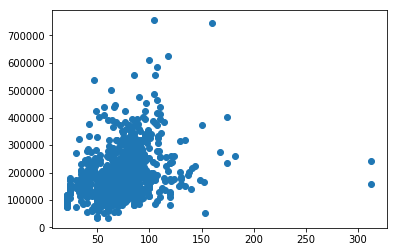

In [10]:
# Plot Scatter for LotFrontage
plt.scatter(data['LotFrontage'],data['SalePrice'])

In [12]:
# Descriptve for Numberical Variables
data[number_var[1:10]].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000


In [13]:
data[number_var[10:20]].describe()

,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000
mean,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003
std,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969
min,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000
50%,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000
75%,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000
max,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000


In [14]:
data[number_var[20:30]].describe()

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000
mean,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811
std,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493
min,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000
75%,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000
max,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000


In [15]:
data[number_var[30:]].describe()

,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


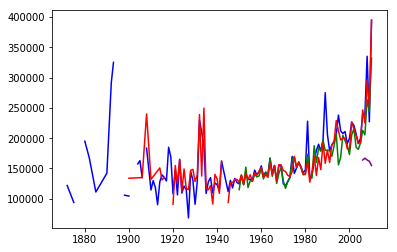

In [17]:
%matplotlib inline
plt.figure(1)
plt.plot(data.groupby(['YearBuilt']).median()['SalePrice'], color='blue')
plt.plot(data.groupby(['YearRemodAdd']).median()['SalePrice'], color='green')
plt.plot(data.groupby(['GarageYrBlt']).median()['SalePrice'], color='red')
plt.plot(data.groupby(['YrSold']).median()['SalePrice'], color='purple')

From above plot, we will just use the YearBuilt variable

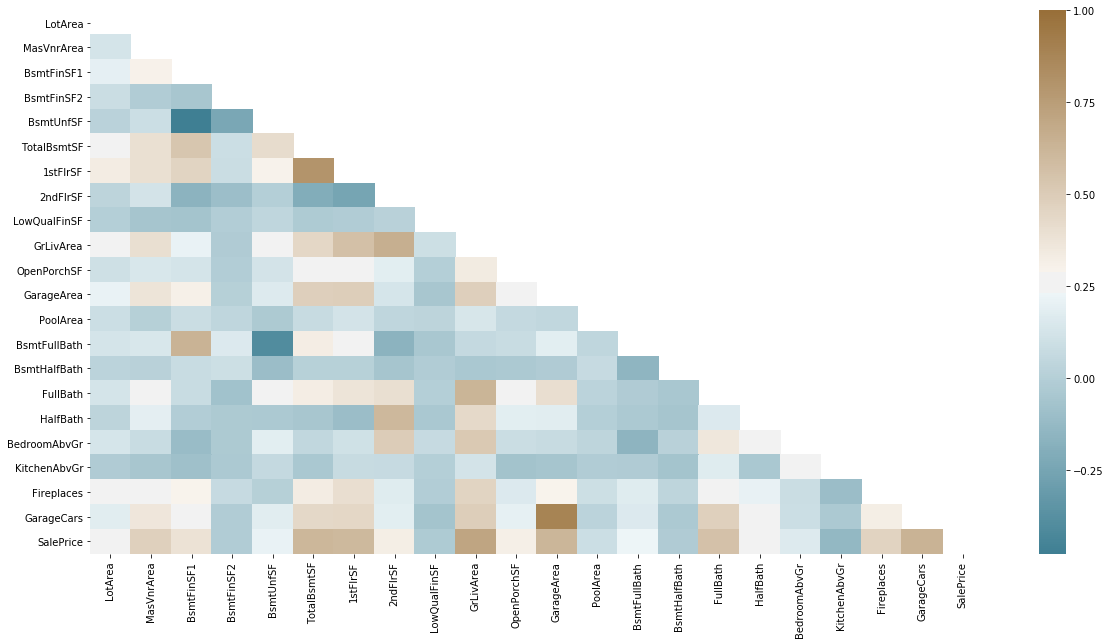

In [43]:
corr_var = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
            'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','OpenPorchSF',
            'GarageArea','PoolArea',
            'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
            'SalePrice']
data_corr = data[corr_var]

corr = data_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(220, 50, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

In [50]:
corr[corr>=0.5].SalePrice 

LotArea              NaN
MasVnrArea           NaN
BsmtFinSF1           NaN
BsmtFinSF2           NaN
BsmtUnfSF            NaN
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF             NaN
LowQualFinSF         NaN
GrLivArea       0.708624
OpenPorchSF          NaN
GarageArea      0.623431
PoolArea             NaN
BsmtFullBath         NaN
BsmtHalfBath         NaN
FullBath        0.560664
HalfBath             NaN
BedroomAbvGr         NaN
KitchenAbvGr         NaN
Fireplaces           NaN
GarageCars      0.640409
SalePrice       1.000000
Name: SalePrice, dtype: float64

Correlation greater than 0.5 with SalePrice:
TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, GarageArea, GarageCars

However, TotalBsmtSF & 1stFlrSF, GrLivArea & FullBath, GarageArea & GarageCars may have multicollinearity

So just choose TotalBsmtSF, GrLivArea, GarageArea as final numerical predict variables.

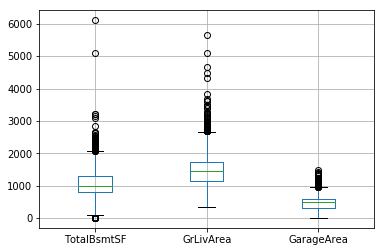

In [48]:
# Check Distribution
boxplot_var = ['TotalBsmtSF','GrLivArea','GarageArea']
data[boxplot_var].boxplot()

In [ ]:
# Check Missing Values
# Categorical Variables
cat_missing = round(np.sum(data[cate_var].isnull())/data.shape[0]*100,2)
print(cat_missing[cat_missing>0].sort_values(ascending=False))

In [ ]:
# Categorical Variables
for i in cate_var:
    print(i, '\n', pd.value_counts(data1[i]), '\n')

In [ ]:
f, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(data1.SaleCondition , data1.SalePrice)

In [ ]:
# ANOVA test for difference
data2 = data1[np.isnan(data1['SalePrice'])==False]

model  = ols('SalePrice ~ MSZoning', data2).fit()
anovat = anova_lm(model)
print(anovat)

In [ ]:
# If ANOVA test significant, move to pairwies tukey test
print(pairwise_tukeyhsd(data2.SalePrice, data2.SaleCondition))

Choose: BldgType, ExterQual, KitchenQual, Neighbor

In [27]:
var_final = ['TotalBsmtSF','GrLivArea','GarageArea','BldgType','ExterQual','KitchenQual','Neighborhood','YearBuilt','SalePrice']

In [78]:
# Delete Variables with Missing Values >= 20%
data_raw = data[var_final]

In [20]:
data_raw.head()

,TotalBsmtSF,GrLivArea,GarageArea,BldgType,ExterQual,KitchenQual,Neighborhood,SalePrice
0,856.0,1710,548.0,1Fam,Gd,Gd,CollgCr,208500.0
1,1262.0,1262,460.0,1Fam,TA,TA,Veenker,181500.0
2,920.0,1786,608.0,1Fam,Gd,Gd,CollgCr,223500.0
3,756.0,1717,642.0,1Fam,TA,Gd,Crawfor,140000.0
4,1145.0,2198,836.0,1Fam,Gd,Gd,NoRidge,250000.0


In [79]:
# Re-categorize
neighbor_high = ['NoRidge','NridgHt','StoneBr']

for i in range(len(data_raw.Neighborhood)):
    if data_raw.Neighborhood.values[i] in neighbor_high:
        data_raw.Neighborhood.values[i] = 'High'
    else:
        data_raw.Neighborhood.values[i] = 'Low'



In [80]:
# Impute Missing Value
for i in range(len(data_raw.KitchenQual)):
    if pd.isnull(data_raw.KitchenQual.values[i])>0 :
        data_raw.KitchenQual.values[i] = 'TA'

# Continuous Variable
cont_var = ['GarageArea','TotalBsmtSF','YearBuilt']
for i in cont_var:
    data_raw[i] = data_raw[i].replace(np.nan, np.mean(data_raw[i]))


C:\Users\alexliuyi\Anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
# LabelEncoder
label = LabelEncoder()
label_var = ['BldgType','ExterQual','KitchenQual','Neighborhood','YearBuilt']

for var in label_var:
    data_raw[var] = label.fit_transform(data_raw[var])


C:\Users\alexliuyi\Anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
# Onehot Encoding
data_feature_array = data_raw[label_var].values

data_list = data_feature_array.tolist()

onehot = OneHotEncoder()

onehot.fit(data_list)

data_onehot = onehot.transform(data_list).toarray()

C:\Users\alexliuyi\Anaconda3\envs\python3.7\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [82]:
final_var = ['TotalBsmtSF','GrLivArea','GarageArea']

data_final = np.hstack((data_raw[final_var], data_onehot))

In [83]:
X_train = data_final[0:1460,:]
X_test  = data_final[1460:,:]

Y_train = data_raw.SalePrice.values[0:1460]

print(X_train.shape, X_test.shape, Y_train.shape)

(1460, 136) (1459, 136) (1460,)


In [84]:
X_model, X_validate, y_model, y_validate = train_test_split(X_train, Y_train, test_size=1/4, random_state=0)

In [85]:
scaler = MinMaxScaler()

X_model_scaled = scaler.fit_transform(X_model)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

LR = LinearRegression()
LR.fit(X_model_scaled, y_model)
MSE = mean_squared_log_error(LR.predict(X_validate_scaled), y_validate)
print(MSE)


NameError: name 'X_model_scaled' is not defined

In [137]:
Lasso = LassoCV(cv=5, alphas=[500])
Lasso.fit(X_model_scaled, y_model)
MSE = mean_squared_log_error(Lasso.predict(X_validate_scaled), y_validate)
print(MSE)

0.0315602442512167


In [99]:
Ridge = RidgeCV(cv=5, alphas=[0.0001,0.001,0.1,1,10,100,1000], normalize= True)
Ridge.fit(X_model_scaled, y_model)
print(Ridge)
MSE = mean_squared_log_error(Ridge.predict(X_validate_scaled), y_validate)
print(MSE)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)
0.03968171142204396


In [138]:
predicted = Lasso.predict(X_test_scaled)

In [139]:
result = pd.DataFrame(predicted)

In [140]:
result.to_csv('C:\\Users\\alexliuyi\\Documents\\Kaggle\\Home Price\\result.csv')

In [562]:
LR.predict(X_test)

array([3.85075478e+08, 5.17631223e+08, 5.58961423e+08, ...,
       4.97689082e+08, 3.54414899e+08, 6.73569877e+08])